<a href="https://colab.research.google.com/github/westmorillo/Tostadisimo-Project_Python-SQL-PowerBi/blob/main/TOSTADISIMO_USER_RETENTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/TOSTADISIMO/BASE DE DATOS/

/content/drive/MyDrive/TOSTADISIMO/BASE DE DATOS


In [ ]:
!ls

'BANCO - CARTOLAS'		     OLD
 CLIENTES			     PROVEEDORES.xlsx
 CLIENTES.xlsx			     rappitotal.xlsx
 Compras			     REPORTS
 COMPRAS-SII			     VENTAS
 CustomerAdquisition.xlsx	     VENTAS.gsheet
 DAU_NUU.xlsx			    'VENTAS - PLATAFORMAS'
 dfcostumerf.xlsx		     VentasSistemaTotal.xlsx
 differenceinvoice_Sii_System.xlsx


In [ ]:
df=pd.read_excel("VentasSistemaTotal.xlsx")

In [ ]:
dfconcat=df[["Fecha","Cliente",'Venta (incl. impuestos)','Telefono cliente']]

In [ ]:
dfconcat.dropna(subset = ['Telefono cliente'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Sección nueva

In [ ]:
dfconcat["Telefono cliente"].head(10)

0     5.695178e+10
13    5.695848e+10
18    5.699185e+10
25    5.693233e+10
27    5.693452e+10
30    5.698675e+10
31    5.697891e+10
34    5.699051e+10
50    5.696376e+10
53    5.695060e+10
Name: Telefono cliente, dtype: float64

In [ ]:
dfconcat

,Fecha,Cliente,Venta (incl. impuestos),Telefono cliente
0,01-11-2021,Jose Gabriel Ortiz,12000.0,5.695178e+10
13,01-11-2021,Arianys Ramírez,19800.0,5.695848e+10
18,01-11-2021,Javiera Diaz,14800.0,5.699185e+10
25,02-11-2021,Rocio,21600.0,5.693233e+10
27,02-11-2021,Felipe Rojas,15300.0,5.693452e+10
...,...,...,...,...
33526,31-01-2020,Guillermo,12250.0,5.699791e+10
33534,31-01-2020,Victor,17490.0,5.697655e+10
33545,31-01-2020,Felipe,10990.0,5.696458e+10
33546,31-01-2020,Erick,22790.0,5.699096e+10


In [ ]:
dfconcat['Telefono cliente'] = df['Telefono cliente'].astype(str)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfconcat["Telefono cliente"]=dfconcat["Telefono cliente"].str[-11:-2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfconcat["Telefono cliente"]

0        951782806
13       958483251
18       991852142
25       932326424
27       934515959
           ...    
33526    997905587
33534    976547241
33545    964578814
33546    990958939
33581    958829205
Name: Telefono cliente, Length: 4900, dtype: object

In [ ]:
dfconcat.dtypes

Fecha                       object
Cliente                     object
Venta (incl. impuestos)    float64
Telefono cliente            object
dtype: object

In [ ]:
dfconcat["Fecha"]=pd.to_datetime(dfconcat.Fecha)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfconcat.dtypes

Fecha                      datetime64[ns]
Cliente                            object
Venta (incl. impuestos)           float64
Telefono cliente                   object
dtype: object

In [ ]:
start_date = dfconcat.groupby('Telefono cliente')['Fecha'].min()
start_date = start_date.rename("start_day")
start_date.head(30)

Telefono cliente
0           2021-03-13
1223        2021-05-12
202         2021-02-28
2022        2021-02-28
211         2021-02-28
232923432   2020-01-08
245886813   2020-04-18
469978173   2020-02-15
692221679   2020-12-16
693313020   2020-01-03
694511724   2020-06-26
694713775   2020-07-31
694926846   2020-08-19
697681016   2021-01-04
698078917   2020-05-06
699389532   2020-12-08
779605299   2021-05-01
798         2020-12-23
841206688   2020-10-15
920088172   2020-07-15
920217633   2021-11-21
920247296   2021-01-04
920320385   2020-10-13
920437715   2021-04-30
920468457   2021-05-19
920511495   2021-06-07
920554844   2021-03-24
920745249   2020-05-15
920909782   2021-06-14
920928626   2020-12-09
Name: start_day, dtype: datetime64[ns]

In [ ]:
dfconcat = pd.merge(dfconcat, start_date, left_on='Telefono cliente', right_index=True)
dfconcat.head(10)

,Fecha,Cliente,Venta (incl. impuestos),Telefono cliente,start_day
0,2021-01-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11
268,2021-08-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11
549,2021-11-17,Jose Gabriel Ortiz,7000.0,951782806,2021-01-11
2297,2021-02-10,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11
3196,2021-10-22,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11
4135,2021-08-15,Jose Gabriel Ortiz,14000.0,951782806,2021-01-11
10156,2021-01-12,Jose Gabriel Ortiz,11300.0,951782806,2021-01-11
10431,2021-08-12,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11
13,2021-01-11,Arianys Ramírez,19800.0,958483251,2021-01-11
11539,2021-09-04,Arianys,17800.0,958483251,2021-01-11


In [ ]:
dfconcat["seniority"]=(dfconcat["Fecha"]-dfconcat["start_day"]).dt.days+1
dfconcat

,Fecha,Cliente,Venta (incl. impuestos),Telefono cliente,start_day,seniority
0,2021-01-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,1
268,2021-08-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,213
549,2021-11-17,Jose Gabriel Ortiz,7000.0,951782806,2021-01-11,311
2297,2021-02-10,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,31
3196,2021-10-22,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,285
...,...,...,...,...,...,...
33403,2020-01-29,Armando,26980.0,945745486,2020-01-29,1
33410,2020-01-29,Diego,11290.0,940723355,2020-01-29,1
33487,2020-01-30,Jimena,14850.0,961497329,2020-01-30,1
33545,2020-01-31,Felipe,10990.0,964578814,2020-01-31,1


In [ ]:
group=dfconcat.groupby(["start_day","seniority"])
cohort_data=group["Telefono cliente"].size()
cohort_data=cohort_data.reset_index()
cohort_data

,start_day,seniority,Telefono cliente
0,2020-01-02,1,3
1,2020-01-02,338,1
2,2020-01-02,382,1
3,2020-01-02,499,1
4,2020-01-03,1,6
...,...,...,...
3547,2021-12-27,1,1
3548,2021-12-28,1,3
3549,2021-12-28,2,1
3550,2021-12-29,1,3


In [ ]:
cohort_counts=cohort_data.pivot(index="start_day", columns="seniority", values="Telefono cliente")
base= cohort_counts[1]
retention= cohort_counts.divide(base, axis=0).round(3)

In [ ]:
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,646,647,649,650,654,655,658,661,662,663,666,667,668,669,670,672,673,674,675,676,677,681,684,685,686,689,692,695,697,698,699,701,702,706,707,709,710,711,712,720
start_day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2020-01-05,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,3.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN
2020-01-08,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-27,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-28,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extract start month
dfconcat['start_month'] = dfconcat['start_day'].values.astype('datetime64[M]')

# Get the number of months since the user started
dfconcat['months_since_start'] = np.floor((dfconcat['Fecha'] - dfconcat['start_month']) / np.timedelta64(1, 'M'))


In [ ]:
#def costumer_status():
#  if dfconcat['start_day'] == dfconcat['Fecha']:
#    return str('NEW USER')
#  else:
#    return str('RETURN USER') 

#dfconcat['customer_status']=dfconcat.apply(lambda x:costumer_status(), axis=1)

  

In [ ]:
dfconcat['customerstatus'] = np.where(dfconcat['start_day']== dfconcat['Fecha'], "NEW USER", "RETURN USER")


In [ ]:
#dfconcat.loc[dfconcat.start_day == dfconcat.Fecha, "Customerstatus"]="NEW USER"
#dfconcat.loc[dfconcat.start_day != dfconcat.Fecha, "Customerstatus"]="RETURN USER"

In [ ]:
dfconcat.dtypes

Fecha                      datetime64[ns]
Cliente                            object
Venta (incl. impuestos)           float64
Telefono cliente                   object
start_day                  datetime64[ns]
seniority                           int64
start_month                datetime64[ns]
months_since_start                float64
customerstatus                     object
dtype: object

In [ ]:
dfconcat

,Fecha,Cliente,Venta (incl. impuestos),Telefono cliente,start_day,seniority,start_month,months_since_start,customerstatus
0,2021-01-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,1,2021-01-01,0.0,NEW USER
268,2021-08-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,213,2021-01-01,7.0,RETURN USER
549,2021-11-17,Jose Gabriel Ortiz,7000.0,951782806,2021-01-11,311,2021-01-01,10.0,RETURN USER
2297,2021-02-10,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,31,2021-01-01,1.0,RETURN USER
3196,2021-10-22,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,285,2021-01-01,9.0,RETURN USER
...,...,...,...,...,...,...,...,...,...
33403,2020-01-29,Armando,26980.0,945745486,2020-01-29,1,2020-01-01,0.0,NEW USER
33410,2020-01-29,Diego,11290.0,940723355,2020-01-29,1,2020-01-01,0.0,NEW USER
33487,2020-01-30,Jimena,14850.0,961497329,2020-01-30,1,2020-01-01,0.0,NEW USER
33545,2020-01-31,Felipe,10990.0,964578814,2020-01-31,1,2020-01-01,0.0,NEW USER


In [ ]:
dfconcat.to_excel("DAU_NUU.xlsx")

In [ ]:
dfcustomer_return_mean=dfconcat.groupby("Telefono cliente").mean()

In [ ]:
dfcustomer_return_mean.mean()

Venta (incl. impuestos)    17271.979591
seniority                     53.494868
months_since_start             1.706106
dtype: float64

In [ ]:
groupmonth=dfconcat.groupby(["start_month","months_since_start"])
cohort_data_month=groupmonth["Telefono cliente"].size()
cohort_data_month=cohort_data_month.reset_index()
cohort_data_month

,start_month,months_since_start,Telefono cliente
0,2020-01-01,0.0,131
1,2020-01-01,1.0,52
2,2020-01-01,2.0,38
3,2020-01-01,3.0,47
4,2020-01-01,4.0,44
...,...,...,...
290,2021-10-01,1.0,2
291,2021-10-01,2.0,3
292,2021-11-01,0.0,47
293,2021-11-01,1.0,5


In [ ]:
cohort_month_counts=cohort_data_month.pivot(index="start_month", columns="months_since_start", values="Telefono cliente")
basemonth= cohort_month_counts[0]
retentionmonth= cohort_month_counts.divide(basemonth, axis=0).round(3)

In [ ]:
cohort_month_counts

months_since_start,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
start_month,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,131.0,52.0,38.0,47.0,44.0,37.0,32.0,37.0,34.0,29.0,41.0,39.0,20.0,25.0,16.0,18.0,34.0,18.0,17.0,14.0,19.0,16.0,20.0,18.0
2020-02-01,80.0,15.0,24.0,16.0,18.0,14.0,25.0,21.0,14.0,22.0,26.0,18.0,9.0,20.0,22.0,20.0,16.0,11.0,13.0,16.0,9.0,12.0,8.0,NaN
2020-03-01,64.0,16.0,14.0,9.0,18.0,12.0,18.0,12.0,19.0,11.0,7.0,11.0,10.0,7.0,6.0,10.0,8.0,8.0,5.0,8.0,4.0,8.0,NaN,NaN
2020-04-01,81.0,14.0,6.0,5.0,6.0,7.0,12.0,12.0,8.0,11.0,8.0,9.0,6.0,13.0,6.0,11.0,4.0,8.0,7.0,7.0,8.0,NaN,NaN,NaN
2020-05-01,103.0,13.0,10.0,8.0,5.0,8.0,7.0,10.0,3.0,3.0,9.0,8.0,2.0,8.0,9.0,14.0,12.0,2.0,7.0,5.0,NaN,NaN,NaN,NaN
2020-06-01,80.0,7.0,10.0,6.0,5.0,5.0,4.0,6.0,5.0,7.0,7.0,5.0,4.0,4.0,6.0,9.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,62.0,13.0,6.0,6.0,8.0,4.0,9.0,6.0,3.0,3.0,5.0,3.0,5.0,2.0,3.0,2.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,74.0,8.0,7.0,7.0,9.0,6.0,2.0,3.0,4.0,4.0,8.0,5.0,9.0,3.0,1.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,40.0,2.0,NaN,2.0,NaN,5.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
basemonth

start_month
2020-01-01    131.0
2020-02-01     80.0
2020-03-01     64.0
2020-04-01     81.0
2020-05-01    103.0
2020-06-01     80.0
2020-07-01     62.0
2020-08-01     74.0
2020-09-01     40.0
2020-10-01     84.0
2020-11-01     64.0
2020-12-01     75.0
2021-01-01    142.0
2021-02-01     98.0
2021-03-01    125.0
2021-04-01    109.0
2021-05-01     96.0
2021-06-01     81.0
2021-07-01     72.0
2021-08-01     90.0
2021-09-01     37.0
2021-10-01     50.0
2021-11-01     47.0
2021-12-01     57.0
Name: 0.0, dtype: float64

In [ ]:
retentionmonth

months_since_start,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
start_month,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1.0,0.397,0.290,0.359,0.336,0.282,0.244,0.282,0.260,0.221,0.313,0.298,0.153,0.191,0.122,0.137,0.260,0.137,0.130,0.107,0.145,0.122,0.153,0.137
2020-02-01,1.0,0.188,0.300,0.200,0.225,0.175,0.312,0.262,0.175,0.275,0.325,0.225,0.112,0.250,0.275,0.250,0.200,0.138,0.162,0.200,0.112,0.150,0.100,NaN
2020-03-01,1.0,0.250,0.219,0.141,0.281,0.188,0.281,0.188,0.297,0.172,0.109,0.172,0.156,0.109,0.094,0.156,0.125,0.125,0.078,0.125,0.062,0.125,NaN,NaN
2020-04-01,1.0,0.173,0.074,0.062,0.074,0.086,0.148,0.148,0.099,0.136,0.099,0.111,0.074,0.160,0.074,0.136,0.049,0.099,0.086,0.086,0.099,NaN,NaN,NaN
2020-05-01,1.0,0.126,0.097,0.078,0.049,0.078,0.068,0.097,0.029,0.029,0.087,0.078,0.019,0.078,0.087,0.136,0.117,0.019,0.068,0.049,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.088,0.125,0.075,0.062,0.062,0.050,0.075,0.062,0.088,0.088,0.062,0.050,0.050,0.075,0.112,0.038,0.038,0.038,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.210,0.097,0.097,0.129,0.065,0.145,0.097,0.048,0.048,0.081,0.048,0.081,0.032,0.048,0.032,0.081,0.081,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.108,0.095,0.095,0.122,0.081,0.027,0.041,0.054,0.054,0.108,0.068,0.122,0.041,0.014,0.081,0.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.050,NaN,0.050,NaN,0.125,0.025,0.025,NaN,0.025,0.025,0.025,0.025,0.075,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


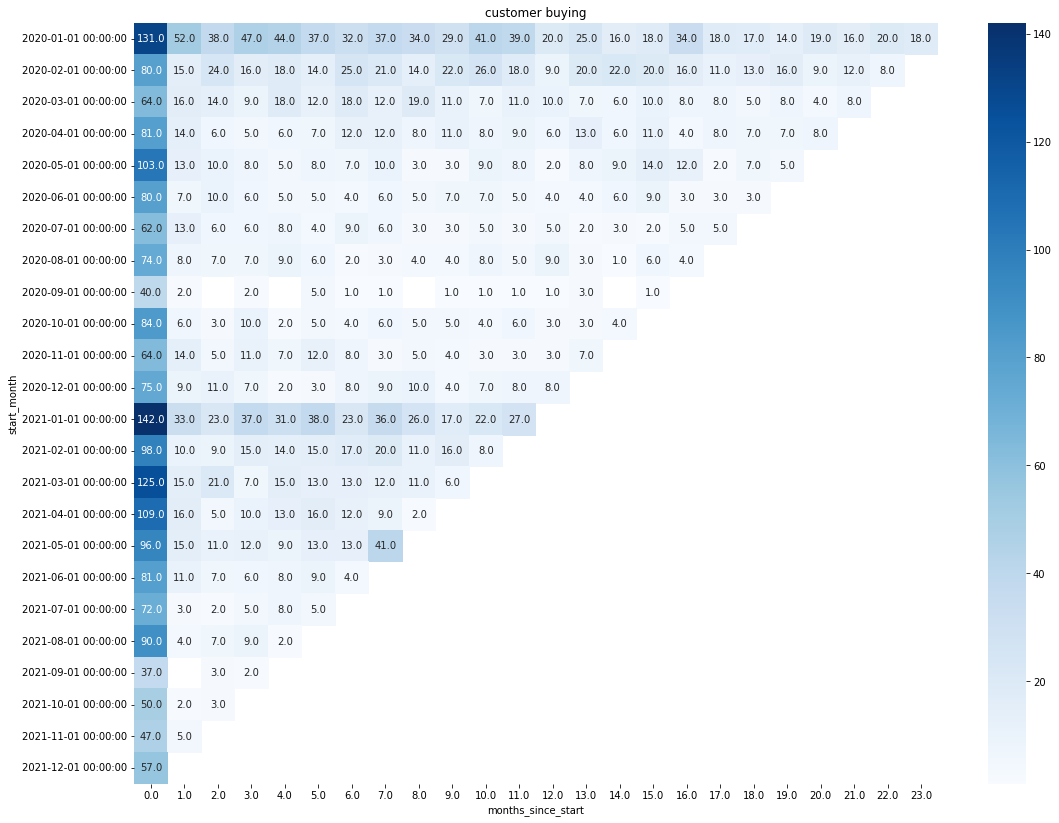

In [ ]:
plt.figure(figsize=(18,14))
plt.title("customer buying")
ax= sns.heatmap(data=cohort_month_counts, annot=True,annot_kws={"size":10} ,cmap="Blues", fmt="")
ax.set_yticklabels(cohort_month_counts.index)
fig=ax.get_figure()
plt.show()

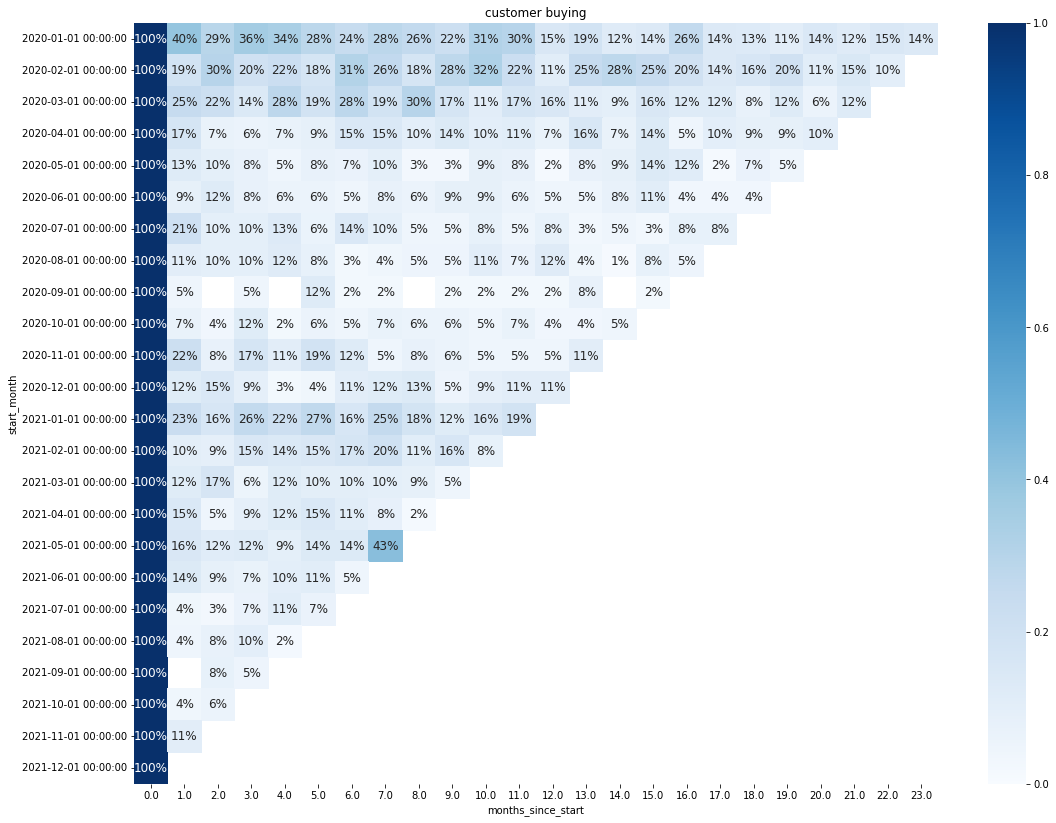

In [ ]:
plt.figure(figsize=(18,14))
plt.title("customer buying")
ax= sns.heatmap(data=retentionmonth, annot=True,annot_kws={"size":12}, vmin=0.0,vmax=1 ,cmap="Blues", fmt=".0%")
ax.set_yticklabels(retentionmonth.index)
fig=ax.get_figure()
plt.show()

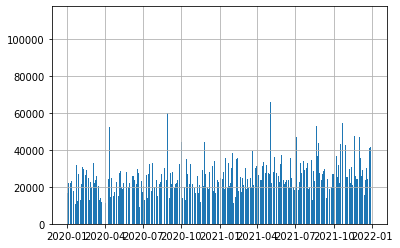

In [ ]:
plt.bar(dfconcat["Fecha"], dfconcat["Venta (incl. impuestos)"])
plt.grid(True)
plt.show()

In [ ]:
dfconcat

,Fecha,Cliente,Venta (incl. impuestos),Telefono cliente,start_day,seniority,start_month,months_since_start,customerstatus
0,2021-01-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,1,2021-01-01,0.0,NEW USER
268,2021-08-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,213,2021-01-01,7.0,RETURN USER
549,2021-11-17,Jose Gabriel Ortiz,7000.0,951782806,2021-01-11,311,2021-01-01,10.0,RETURN USER
2297,2021-02-10,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,31,2021-01-01,1.0,RETURN USER
3196,2021-10-22,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,285,2021-01-01,9.0,RETURN USER
...,...,...,...,...,...,...,...,...,...
33403,2020-01-29,Armando,26980.0,945745486,2020-01-29,1,2020-01-01,0.0,NEW USER
33410,2020-01-29,Diego,11290.0,940723355,2020-01-29,1,2020-01-01,0.0,NEW USER
33487,2020-01-30,Jimena,14850.0,961497329,2020-01-30,1,2020-01-01,0.0,NEW USER
33545,2020-01-31,Felipe,10990.0,964578814,2020-01-31,1,2020-01-01,0.0,NEW USER


In [ ]:
dfcostumerf=dfconcat

In [ ]:
dfcostumerf.dtypes

Fecha                      datetime64[ns]
Cliente                            object
Venta (incl. impuestos)           float64
Telefono cliente                   object
start_day                  datetime64[ns]
seniority                           int64
start_month                datetime64[ns]
months_since_start                float64
customerstatus                     object
dtype: object

In [ ]:
dfcostumerf['Year']=dfcostumerf['Fecha'].dt.year

In [ ]:
dfcostumerf['Month']=dfcostumerf['Fecha'].dt.month

In [ ]:
dfcostumerf

,Fecha,Cliente,Venta (incl. impuestos),Telefono cliente,start_day,seniority,start_month,months_since_start,customerstatus,Year,Month
0,2021-01-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,1,2021-01-01,0.0,NEW USER,2021,1
268,2021-08-11,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,213,2021-01-01,7.0,RETURN USER,2021,8
549,2021-11-17,Jose Gabriel Ortiz,7000.0,951782806,2021-01-11,311,2021-01-01,10.0,RETURN USER,2021,11
2297,2021-02-10,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,31,2021-01-01,1.0,RETURN USER,2021,2
3196,2021-10-22,Jose Gabriel Ortiz,12000.0,951782806,2021-01-11,285,2021-01-01,9.0,RETURN USER,2021,10
...,...,...,...,...,...,...,...,...,...,...,...
33403,2020-01-29,Armando,26980.0,945745486,2020-01-29,1,2020-01-01,0.0,NEW USER,2020,1
33410,2020-01-29,Diego,11290.0,940723355,2020-01-29,1,2020-01-01,0.0,NEW USER,2020,1
33487,2020-01-30,Jimena,14850.0,961497329,2020-01-30,1,2020-01-01,0.0,NEW USER,2020,1
33545,2020-01-31,Felipe,10990.0,964578814,2020-01-31,1,2020-01-01,0.0,NEW USER,2020,1


In [ ]:
dfcostumerf=dfcostumerf.groupby(['Year','Month','Telefono cliente','Fecha'])['Cliente'].count()

In [ ]:
dfcostumerf=dfcostumerf.reset_index()

In [ ]:
dfcostumerf

,Year,Month,Telefono cliente,Fecha,Cliente
0,2020,1,232923432,2020-01-08,1
1,2020,1,693313020,2020-01-03,1
2,2020,1,931269567,2020-01-12,1
3,2020,1,932471422,2020-01-30,1
4,2020,1,932609525,2020-01-17,2
...,...,...,...,...,...
4822,2021,12,998164680,2021-12-30,1
4823,2021,12,998671576,2021-12-13,1
4824,2021,12,998865462,2021-12-19,1
4825,2021,12,999251032,2021-12-02,1


In [ ]:
dfcostumerf.to_excel('dfcostumerf.xlsx')